In [2]:
import math
# import pandas_datareader as web
import tushare as ts
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [95]:
# df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
pro = ts.pro_api()
df = pro.daily(ts_code='000001.SZ', start_date='20110101', end_date='20210120')
# df.head()

In [96]:
df.shape

(2425, 11)

In [97]:
df['trade_date'] = pd.to_datetime(df.trade_date, format='%Y%m%d')
df.index = df['trade_date']
df = df.sort_index()
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2011-01-04,000001.SZ,2011-01-04,15.82,16.18,15.65,16.02,15.79,0.23,1.4600,358840.61,5.733437e+05
2011-01-05,000001.SZ,2011-01-05,15.99,16.13,15.91,15.93,16.02,-0.09,-0.5600,237462.63,3.798691e+05
2011-01-06,000001.SZ,2011-01-06,15.93,16.08,15.70,15.81,15.93,-0.12,-0.7500,206531.27,3.271489e+05
2011-01-07,000001.SZ,2011-01-07,15.80,16.78,15.70,16.41,15.81,0.60,3.8000,770482.21,1.263299e+06
2011-01-10,000001.SZ,2011-01-10,16.23,16.40,15.90,15.98,16.41,-0.43,-2.6200,361872.13,5.841725e+05
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-14,000001.SZ,2021-01-14,20.68,20.89,19.95,20.17,20.70,-0.53,-2.5604,1130155.62,2.306405e+06
2021-01-15,000001.SZ,2021-01-15,21.00,21.95,20.82,21.00,20.17,0.83,4.1150,2480688.98,5.311218e+06
2021-01-18,000001.SZ,2021-01-18,21.20,22.78,21.20,22.70,21.00,1.70,8.0952,2157301.78,4.792909e+06


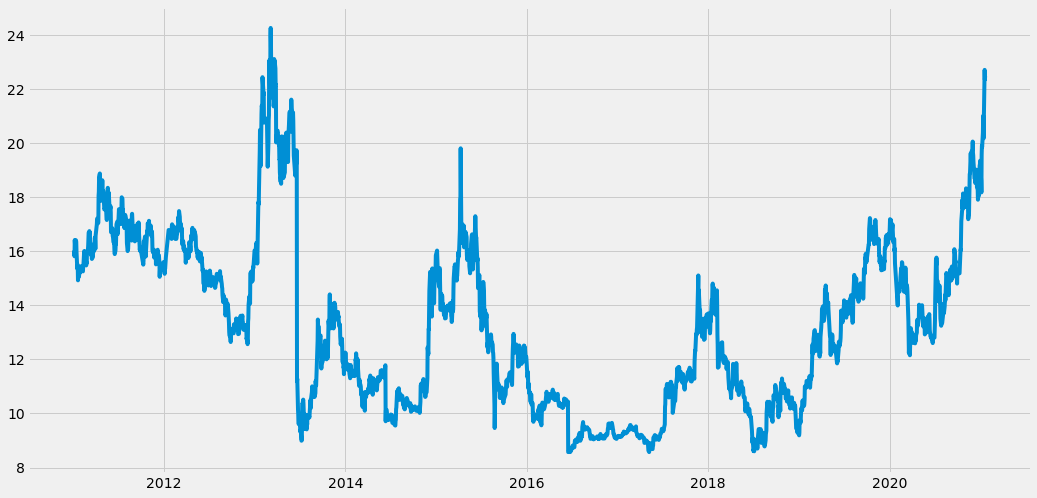

In [98]:
plt.figure(figsize=(16,8))
plt.plot(df['close'], label='Close Price history')

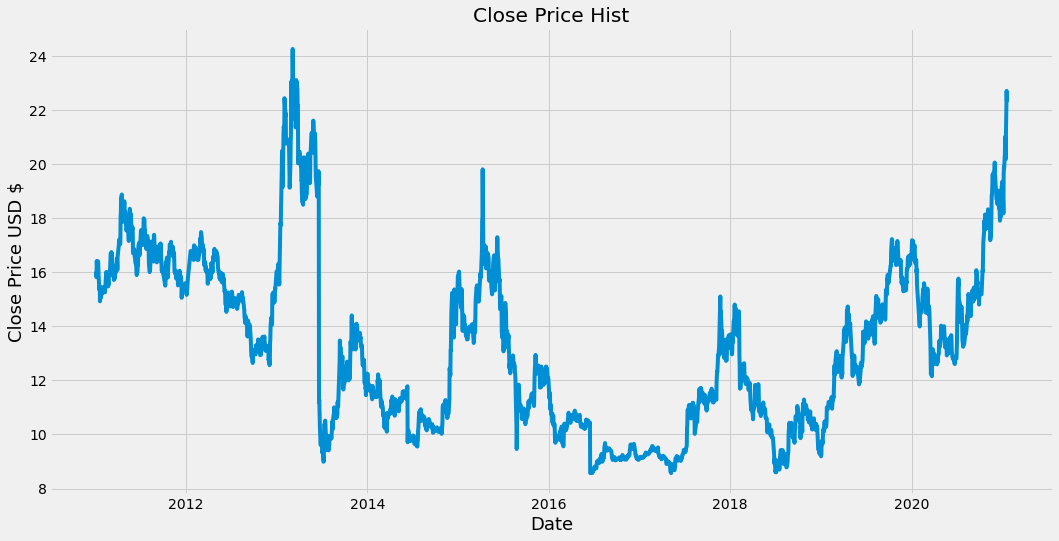

In [99]:
plt.figure(figsize=(16, 8))
plt.title('Close Price Hist')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.show()

In [100]:
data = df.filter(['close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1940

In [101]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.47512755],
       [0.46938776],
       [0.46173469],
       ...,
       [0.90114796],
       [0.87818878],
       [0.88647959]])

In [102]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

# ????
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.47512755, 0.46938776, 0.46173469, 0.5       , 0.47257653,
       0.48596939, 0.49936224, 0.49553571, 0.47321429, 0.43431122,
       0.4317602 , 0.44132653, 0.40497449, 0.41964286, 0.41326531,
       0.42091837, 0.42665816, 0.43112245, 0.42283163, 0.42984694,
       0.43813776, 0.42602041, 0.43877551, 0.44196429, 0.47385204,
       0.46237245, 0.46619898, 0.47257653, 0.47257653, 0.47193878,
       0.44005102, 0.44706633, 0.44579082, 0.46683673, 0.46938776,
       0.47640306, 0.48533163, 0.49936224, 0.51721939, 0.52104592,
       0.51530612, 0.51785714, 0.48979592, 0.47704082, 0.48469388,
       0.46364796, 0.47066327, 0.45535714, 0.4630102 , 0.45918367,
       0.4744898 , 0.48022959, 0.47257653, 0.49043367, 0.49489796,
       0.5057398 , 0.49808673, 0.47895408, 0.51020408, 0.53762755])]
[0.5503826530612244]

[array([0.47512755, 0.46938776, 0.46173469, 0.5       , 0.47257653,
       0.48596939, 0.49936224, 0.49553571, 0.47321429, 0.43431122,
       0.4317602 , 0.44132653, 0.404

In [103]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1880, 60, 1)

In [104]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [105]:
model.compile(optimizer='adam', loss="mean_squared_error")
model.fit(x_train, y_train, batch_size=1, epochs=1)

1880/1880 [==============================] - 74s 39ms/step - loss: 0.0026


In [106]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [107]:
x_test = np.array(x_test)

In [108]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [109]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [110]:
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

0.48033178710937496

<ipython-input-118-26569fd17488>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


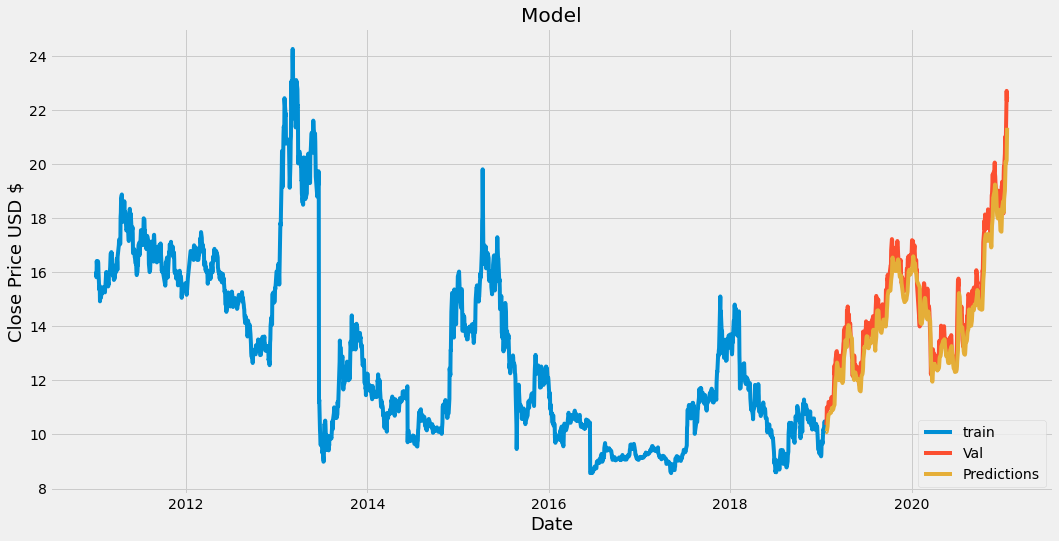

,close,Predictions
trade_date,,
2019-01-23,10.35,10.096633
2019-01-24,10.52,10.087075
2019-01-25,11.00,10.126572
2019-01-28,10.94,10.296961
2019-01-29,11.00,10.456967
...,...,...
2021-01-14,20.17,20.085575
2021-01-15,21.00,20.014936
2021-01-18,22.70,20.130381


In [118]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['train', 'Val', 'Predictions'], loc='lower right')
plt.show()
valid[['close', 'Predictions']]

In [114]:
# apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
apple_quote = pro.daily(ts_code='000001.SZ', start_date='20100120', end_date='20210120')
new_df = apple_quote.filter(['close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
# apple_quote.head()

[[21.61981]]


In [113]:
# apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
apple_quote2 = pro.daily(ts_code='000001.SZ', start_date='20210119', end_date='20210119')
# apple_quote2
print(apple_quote2['close'])

0    22.34
Name: close, dtype: float64
